# CGC Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.options.display.max_columns=1000
plt.style.use(style='seaborn')

In [3]:
df_cgc = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/cgc.csv')
df_cgc['Date'] = pd.to_datetime(df_cgc['Date'])
df_cgc = df_cgc.set_index('Date')
df_cgc = df_cgc.rename(columns={'Open':'cgc_Open', 'High':'cgc_High', 'Low':'cgc_Low', 'Close':'cgc_Close', 'Volume':'cgc_Volume'})
df_cgc = df_cgc.drop('Adj Close', axis=1)
df_cgc['cgc_prev_close'] = df_cgc['cgc_Close'].shift(1)
df_cgc['cgc_next_close'] = df_cgc['cgc_Close'].shift(-1)
df_cgc['cgc_diff'] = df_cgc['cgc_Close'].diff()
df_cgc['cgc_%change'] = df_cgc['cgc_Close'].pct_change()
df_cgc['cgc_5day_avg_close'] = df_cgc['cgc_Close'].rolling(5).mean()
df_cgc['cgc_5day_avg_diff'] = df_cgc['cgc_diff'].rolling(5).mean()
df_cgc['cgc_10day_avg_close'] = df_cgc['cgc_Close'].rolling(10).mean()
df_cgc['cgc_10day_avg_diff'] = df_cgc['cgc_diff'].rolling(10).mean()

In [4]:
df_cgc

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520             NaN    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  
Date                            
2014-04-07                 NaN  
2014-04-08                 NaN  
2014-04-09                 NaN  
2014-04-10                 NaN  
2014-04-11                 NaN  
...                        ...  
2022-05-17              -0.017  
2022-05-18              -0.108  
2022-05-19              -0.020  
2022-05-20              -0.045  
2022-05-23              -0.036  

[2048 rows x 13 columns]

In [5]:
cut = df_cgc.index.min()
cut

Timestamp('2014-04-07 00:00:00')

Text(0.5, 0, 'CGC Close')

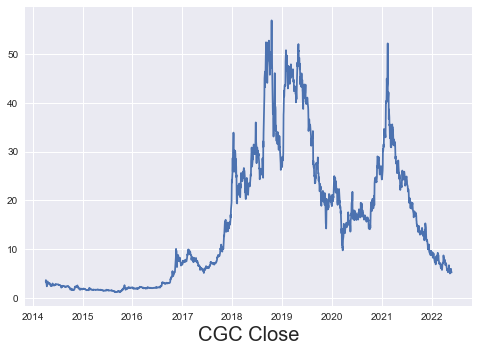

In [6]:
plt.plot(df_cgc['cgc_Close'])
plt.xlabel('CGC Close', fontsize=20)

## CGC and DJIX

In [7]:
df_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_dow.csv')
df_dow['Date'] = pd.to_datetime(df_dow['Date'])
df_dow = df_dow.set_index('Date')
df_dow

djix_Open  djix_High  djix_Low  djix_Close  djix_Volume  \
Date                                                                  
1896-05-27      29.39      29.39     29.39       29.39          NaN   
1896-05-28      29.11      29.11     29.11       29.11          NaN   
1896-05-29      29.43      29.43     29.43       29.43          NaN   
1896-06-01      29.40      29.40     29.40       29.40          NaN   
1896-06-02      29.00      29.00     29.00       29.00          NaN   
...               ...        ...       ...         ...          ...   
2022-05-18   32468.67   32468.67  31393.95    31490.07  508465869.0   
2022-05-19   31262.62   31569.13  31016.41    31253.13  554268268.0   
2022-05-20   31426.94   31515.78  30635.76    31261.90  551025623.0   
2022-05-23   31395.89   31968.42  31395.89    31880.24  452693827.0   
2022-05-24   31717.61   32014.86  31365.59    31928.62  428081450.0   

            djix_prev_close  djix_next_close  djix_diff  djix_%change  \
Date                                                                    
1896-05-27              NaN            29.11        NaN           NaN   
1896-05-28            29.39            29.43      -0.28     -0.009527   
1896-05-29            29.11            29.40       0.32      0.010993   
1896-06-01            29.43            29.00      -0.03     -0.001019   
1896-06-02            29.40            28.80      -0.40     -0.013605   
...                     ...              ...        ...           ...   
2022-05-18         32654.59         31253.13   -1164.52     -0.035662   
2022-05-19         31490.07         31261.90    -236.94     -0.007524   
2022-05-20         31253.13         31880.24       8.77      0.000281   
2022-05-23         31261.90         31928.62     618.34      0.019779   
2022-05-24         31880.24              NaN      48.38      0.001518   

            djix_5day_avg_close  djix_5day_avg_diff  djix_10day_avg_close  \
Date                                                                        
1896-05-27                  NaN                 NaN                   NaN   
1896-05-28                  NaN                 NaN                   NaN   
1896-05-29                  NaN                 NaN                   NaN   
1896-06-01                  NaN                 NaN                   NaN   
1896-06-02               29.266                 NaN                   NaN   
...                         ...                 ...                   ...   
2022-05-18            32059.008             -68.808             32243.293   
2022-05-19            31963.574             -95.434             32068.809   
2022-05-20            31776.622            -186.952             31905.062   
2022-05-23            31707.986             -68.636             31868.516   
2022-05-24            31562.792            -145.194             31845.304   

            djix_10day_avg_diff  
Date                             
1896-05-27                  NaN  
1896-05-28                  NaN  
1896-05-29                  NaN  
1896-06-01                  NaN  
1896-06-02                  NaN  
...                         ...  
2022-05-18             -257.099  
2022-05-19             -174.484  
2022-05-20             -163.747  
2022-05-23              -36.546  
2022-05-24              -23.212  

[32641 rows x 13 columns]

In [8]:
df0 = pd.merge(df_cgc, df_dow, on='Date', how='left')
df0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520             NaN    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 NaN   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 NaN   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 NaN   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 NaN   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 NaN   16170.22   16170.22  16015.32    16052.12   
...                        ...        ...        ...       ...         ...   
2022-05-17              -0.017   32427.00   32689.14  32308.15    32654.59   
2022-05-18              -0.108   32468.67   32468.67  31393.95    31490.07   
2022-05-19              -0.020   31262.62   31569.13  31016.41    31253.13   
2022-05-20              -0.045   31426.94   31515.78  30635.76    31261.90   
2022-05-23              -0.036   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18    

In [9]:
df_isna0 = df0.isna()
df_isna0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                True      False      False     False       False   
2014-04-08                True      False      False     False       False   
2014-04-09                True      False      False     False       False   
2014-04-10                True      False      False     False       False   
2014-04-11                True      False      False     False       False   
...                        ...        ...        ...       ...         ...   
2022-05-17               False      False      False     False       False   
2022-05-18               False      False      False     False       False   
2022-05-19               False      False      False     False       False   
2022-05-20               False      False      False     False       False   
2022-05-23               False      False      False     False       False   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07        False            False            False      False   
2014-04-08        False            False            False    

In [10]:
df_isna0 = df_isna0.add_suffix('_b')

In [11]:
df0 = df0.fillna(0)
df0.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 0.0   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 0.0   16170.22   16170.22  16015.32    16052.12   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   
2014-04-10  112559553.0         16437.18         16052.12    -266.96   
2014-04-11  119598160.0         16170.22         16173.24    -118.10   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   
2014-04-10     -0.016241            16306.044             -80.466   
2014-04-11     -0.007304            16232.306             -73.738   

            djix_10day_avg_close  djix_10day_avg_diff  
Date                                                   
2014-04-07             16402.666               -3.082  
2014-04-08             16391.492              -11.174  
2014-04-09             16408.311               16.819  
2014-04-10             16398.910               -9.401  
2014-04-11             16371.816              -27.094

In [12]:
df0 = pd.concat([df0, df_isna0], axis=1)
df0

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07               0.000   16420.81   16421.25  16244.39    16245.87   
2014-04-08               0.000   16245.87   16296.86  16180.68    16256.14   
2014-04-09               0.000   16256.14   16438.82  16256.14    16437.18   
2014-04-10               0.000   16437.18   16455.29  16153.59    16170.22   
2014-04-11               0.000   16170.22   16170.22  16015.32    16052.12   
...                        ...        ...        ...       ...         ...   
2022-05-17              -0.017   32427.00   32689.14  32308.15    32654.59   
2022-05-18              -0.108   32468.67   32468.67  31393.95    31490.07   
2022-05-19              -0.020   31262.62   31569.13  31016.41    31253.13   
2022-05-20              -0.045   31426.94   31515.78  30635.76    31261.90   
2022-05-23              -0.036   31395.89   31968.42  31395.89    31880.24   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18    

In [13]:
df0['month'] = df0.index.month
df0['day'] = df0.index.day
df0['year'] = df0.index.year
df0['quarter'] = (df0['month']-1)//3 + 1

In [14]:
cols = df0.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [15]:
df0 = df0[cols].copy()
df0.head()

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   
2014-04-10                 0.0   16437.18   16455.29  16153.59    16170.22   
2014-04-11                 0.0   16170.22   16170.22  16015.32    16052.12   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   
2014-04-10  112559553.0         16437.18         16052.12    -266.96   
2014-04-11  119598160.0         16170.22         16173.24    -118.10   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   
2014-04-10     -0.016241            16306.044             -80.466   
2014-04-11     -0.007304            16232.306             -73.738   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2014-04-07             16402.666               -3.082       False       False   
2014-04-08             16391.492              -11.174       False       False   
2014-04-09             16408.311               16.819       False       False   
2014-04-10             16398.910               -9.401       False       False   
2014-04-11             16371.816              -27.094       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2014-04-07      False        False         False              True   
2014-04-08      False        False         

In [16]:
df0.drop(df0.tail(1).index, inplace=True)

In [17]:
df0.shape

(2047, 56)

In [18]:
n = int(len(df0) * 0.9)
n

1842

In [19]:
train0 = df0[:n]
test0 = df0[n:]

In [20]:
print(len(train0))
print(len(test0))

1842
205


In [21]:
X_train0 = train0.drop('cgc_next_close', axis=1)
X_train0.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2014-04-07                 0.0   16420.81   16421.25  16244.39    16245.87   
2014-04-08                 0.0   16245.87   16296.86  16180.68    16256.14   
2014-04-09                 0.0   16256.14   16438.82  16256.14    16437.18   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2014-04-07  116637706.0         16420.81         16256.14    -174.94   
2014-04-08   98516515.0         16245.87         16437.18      10.27   
2014-04-09   91547700.0         16256.14         16170.22     181.04   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2014-04-07     -0.010654            16468.968             -42.358   
2014-04-08      0.000632            16413.674             -55.294   
2014-04-09      0.011137            16386.510             -27.164   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2014-04-07             16402.666               -3.082       False       False   
2014-04-08             16391.492              -11.174       False       False   
2014-04-09             16408.311               16.819       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2014-04-07      False        False         False              True   
2014-04-08      False        False         False             False   
2014-04-09      False        False         False             False   

            cgc_next_close_b  cgc_diff_b  cgc_%change_b  cgc_5day_avg_close_b  \
Date                                                                            
2014-04-07             False        True           True                  True   
2014-04-08             False       False          False                  True   
2014-04-09             False       False          False                  True   

            cgc_5day_avg_diff_b  cgc_10day_avg_close_b  cgc_10day_avg_diff_b  \
Date                                                                           
2014-04-07                 True                   True                  True   
2014-04-08                 True                   True                  True   
2014-04-09                 True                   True                  True   

            djix_Open_b  djix_High_b  djix_Low_b  djix_Close_b  djix_Volume_b  \
Date                                                                            
2014-04-07        False        False       False         False          False   
2014

In [22]:
X_train0.shape

(1842, 55)

In [23]:
y_train0 = train0['cgc_next_close']
y_train0.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [24]:
y_train0.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [25]:
X_test0 = test0.drop('cgc_next_close', axis=1)
y_test0 = test0['cgc_next_close']

In [26]:
X_test0.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff  djix_Open  djix_High  djix_Low  djix_Close  \
Date                                                                         
2021-07-30              -0.067   35013.26   35106.30  34871.13    34935.47   
2021-08-02              -0.061   34968.56   35192.11  34808.20    34838.16   
2021-08-03              -0.118   34864.10   35120.94  34714.33    35116.40   

            djix_Volume  djix_prev_close  djix_next_close  djix_diff  \
Date                                                                   
2021-07-30  331053467.0         35084.53         34838.16    -149.06   
2021-08-02  305922456.0         34935.47         35116.40     -97.31   
2021-08-03  321747859.0         34838.16         34792.67     278.24   

            djix_%change  djix_5day_avg_close  djix_5day_avg_diff  \
Date                                                                
2021-07-30     -0.004249            35030.752             -25.216   
2021-08-02     -0.002785            34969.522             -61.230   
2021-08-03      0.007987            34981.098              11.576   

            djix_10day_avg_close  djix_10day_avg_diff  cgc_Open_b  cgc_High_b  \
Date                                                                            
2021-07-30             34831.069               24.762       False       False   
2021-08-02             34918.681               87.612       False       False   
2021-08-03             34979.122               60.441       False       False   

            cgc_Low_b  cgc_Close_b  cgc_Volume_b  cgc_prev_close_b  \
Date                                                                 
2021-07-30      False        False         False             False   
2021-08-02      False        False         False             False   
2021-08-03      False        False         False             False   

            cgc_next_close_b  cgc_diff_b  cgc_%change_b  cgc_5day_avg_close_b  \
Date                                                                            
2021-07-30             False       False          False                 False   
2021-08-02             False       False          False                 False   
2021-08-03             False       False          False                 False   

            cgc_5day_avg_diff_b  cgc_10day_avg_close_b  cgc_10day_avg_diff_b  \
Date                                                                           
2021-07-30                False                  False                 False   
2021-08-02                False                  False                 False   
2021-08-03                False                  False                 False   

            djix_Open_b  djix_High_b  djix_Low_b  djix_Close_b  djix_Volume_b  \
Date                                                                            
2021-07-30        False        False       False         False   

In [27]:
X_test0.shape

(205, 55)

In [28]:
y_test0.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression
hyper_table = list()

In [30]:
model0 = LinearRegression()
model0.fit(X_train0, y_train0)
y_pred0 = model0.predict(X_test0)

In [31]:
y_pred0[:5]

array([18.75067115, 19.02710355, 18.55798281, 18.4160885 , 19.21469776])

In [32]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man0 = rmse_manual(y_test0, y_pred0)
print(rmse_man0)

0.4466338978134956


In [33]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man0 = mae_manual(y_test0, y_pred0)
print(mae_man0)

0.34877934963812884


In [34]:
y_train0 = pd.DataFrame(y_train0, columns=['cgc_next_close'])
y_test0 = pd.DataFrame(y_test0, columns=['cgc_next_close'])

In [35]:
y_test0['cgc_pred_next_close'] = y_pred0

In [36]:
y_test0.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             6.095567
2022-05-17            5.59             5.151752
2022-05-18            5.87             5.223551
2022-05-19            5.52             5.966593
2022-05-20            5.19             6.010600

In [37]:
hyper_table.append(dict(stock='cgc', 
                        version='1+Dow',
                        model=model0, 
                        rmse=rmse_man0,
                        mae=mae_man0,
                        actual_price=y_test0['cgc_next_close'][-1],
                        predicted_price=y_test0['cgc_pred_next_close'][-1],
                        rows=df0.shape[0], 
                        train_rows=X_train0.shape[0],
                        test_rows=X_test0.shape[0],
                        columns=df0.shape[1]))

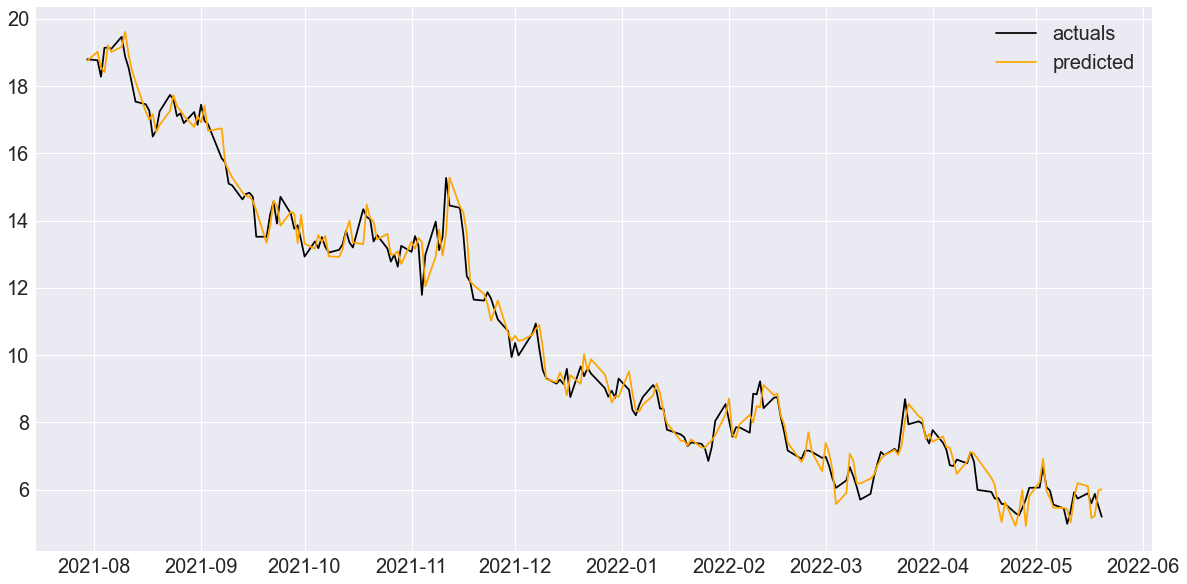

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test0['cgc_next_close'], color='black')
ax.plot(y_test0['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CGC and Cannabis ETFs

In [39]:
df_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs.csv')
df_etfs['Date'] = pd.to_datetime(df_etfs['Date'])
df_etfs = df_etfs.set_index('Date')

In [40]:
df1 = pd.merge(df_cgc, df_etfs, on='Date', how='left')
df1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520             NaN    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-08                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-09                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-10                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-11                 NaN      NaN      NaN     NaN       NaN        NaN   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86   7.420      7.60  1251900.0   
2022-05-23              -0.036     7.62     7.64   7.409      7.46   960700.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            NaN            NaN      NaN         NaN   
2014-04-08            NaN            NaN   

In [41]:
df_isna1 = df1.isna()
df_isna1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                True     True     True    True      True       True   
2014-04-08                True     True     True    True      True       True   
2014-04-09                True     True     True    True      True       True   
2014-04-10                True     True     True    True      True       True   
2014-04-11                True     True     True    True      True       True   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17               False    False    False   False     False      False   
2022-05-18               False    False    False   False     False      False   
2022-05-19               False    False    False   False     False      False   
2022-05-20               False    False    False   False     False      False   
2022-05-23               False    False    False   False     False      False   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           True           True     True        True   
2014-04-08           True           True   

In [42]:
df_isna1 = df_isna1.add_suffix('_b')

In [43]:
df1 = df1.fillna(0)
df1.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-10                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-11                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   
2014-04-10            0.0            0.0      0.0         0.0   
2014-04-11            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   
2014-04-10                0.0               0.0                 0.0   
2014-04-11                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   
2014-04-10                0.0        0.0        0.0       0.0         0.0   
2014-04-11                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   
2014-04-10          0.0              0.0              0.0        0.0   
2014-04-11          0.0              0.0            

In [44]:
df1 = pd.concat([df1, df_isna1], axis=1)
df1

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-08               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-09               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-10               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-11               0.000     0.00     0.00   0.000      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86   7.420      7.60  1251900.0   
2022-05-23              -0.036     7.62     7.64   7.409      7.46   960700.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           0.00           0.00     0.00    0.000000   
2014-04-08           0.00           0.00   

In [45]:
df1['month'] = df1.index.month
df1['day'] = df1.index.day
df1['year'] = df1.index.year
df1['quarter'] = (df1['month']-1)//3 + 1

In [46]:
cols = df1.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [47]:
df1 = df1[cols].copy()
df1

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-08               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-09               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-10               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-11               0.000     0.00     0.00   0.000      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86  

In [48]:
df1.drop(df1.tail(1).index, inplace=True)

In [49]:
n = int(len(df1) * 0.9)
n

1842

In [50]:
train1 = df1[:n]
test1 = df1[n:]

In [51]:
print(len(train1))
print(len(test1))

1842
205


In [52]:
X_train1 = train1.drop('cgc_next_close', axis=1)
X_train1.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2014-04-07           0.0                  0.0                 0.0   
2014-04-08           0.0                  0.0                 0.0   
2014-04-09           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2014-04-07                   0.0                  0.0        0.0        0.0   
2014-04-08                   0.0                  0.0        0.0        0.0   
2014-04-09                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2014-04-07       0.0         0.0          0.0              0.0   
2014-04-08       0.0         0.0          0.0              0.0   
2014-04-09       0.0         0.0          0.0              0.0   

 

In [53]:
X_train1.shape

(1842, 159)

In [54]:
y_train1 = train1['cgc_next_close']
y_train1.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [55]:
y_train1.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [56]:
X_test1 = test1.drop('cgc_next_close', axis=1)
y_test1 = test1['cgc_next_close']

In [57]:
X_test1.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff    mj_Open  mj_High     mj_Low   mj_Close  \
Date                                                                       
2021-07-30              -0.067  18.059999   18.420  17.888000  17.959999   
2021-08-02              -0.061  18.010000   18.386  17.879999  17.879999   
2021-08-03              -0.118  17.900000   17.990  17.639999  17.889999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-07-30   586900.0      18.320000      17.879999 -0.360001   -0.019651   
2021-08-02   766700.0      17.959999      17.889999 -0.080000   -0.004454   
2021-08-03   576300.0      17.879999      17.420000  0.010000    0.000559   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-07-30             18.018              0.05              17.911   
2021-08-02             18.028              0.01              17.955   
2021-08-03             18.118              0.09              17.965   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-07-30              0.021  35.549999  35.820000  35.209999   35.639999   
2021-08-02              0.044  35.669998  36.450001  35.669998   36.410000   
2021-08-03              0.010  36.139999  36.247002  35.950001   36.090000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-07-30     436900.0        35.830002            36.41  -0.190003   
2021-08-02     490400.0        35.639999            36.09   0.770001   
2021-08-03     196500.0        36.410000            35.68  -0.320000   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-07-30     -0.005303               35.648           -0.170001   
2021-08-02      0.021605               35.750            0.102000   
2021-08-03     -0.008789               35.958            0.208000   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-07-30             36.225000               -0.178  18.889999  19.129000   
2021-08-02             36.252001                0.027  18.889999  19.191000   
2021-08-03             36.181001               -0.071  18.950001  18.969999   

             yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                              
2021-07-30  18.650000   18.889999      63300.0        19.150000   
2021-08-02  18.889999   18.959999      51900.0        18.889999   
2021

In [58]:
X_test1.shape

(205, 159)

In [59]:
y_test1.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [60]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

In [61]:
y_pred1[:5]

array([18.62411957, 18.75407448, 17.86130129, 19.09045078, 19.00047174])

In [62]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man1 = rmse_manual(y_test1, y_pred1)
print(rmse_man1)

0.37460482404733253


In [63]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man1 = mae_manual(y_test1, y_pred1)
print(mae_man1)

0.2584214196135203


In [64]:
y_train1 = pd.DataFrame(y_train1, columns=['cgc_next_close'])
y_test1 = pd.DataFrame(y_test1, columns=['cgc_next_close'])

In [65]:
y_test1['cgc_pred_next_close'] = y_pred1

In [66]:
y_test1.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             6.101516
2022-05-17            5.59             5.153183
2022-05-18            5.87             5.580632
2022-05-19            5.52             6.310416
2022-05-20            5.19             6.002075

In [67]:
hyper_table.append(dict(stock='cgc', 
                        version='1+ETFs',
                        model=model1, 
                        rmse=rmse_man1,
                        mae=mae_man1,
                        actual_price=y_test1['cgc_next_close'][-1],
                        predicted_price=y_test1['cgc_pred_next_close'][-1],
                        rows=df1.shape[0], 
                        train_rows=X_train1.shape[0],
                        test_rows=X_test1.shape[0],
                        columns=df1.shape[1]))

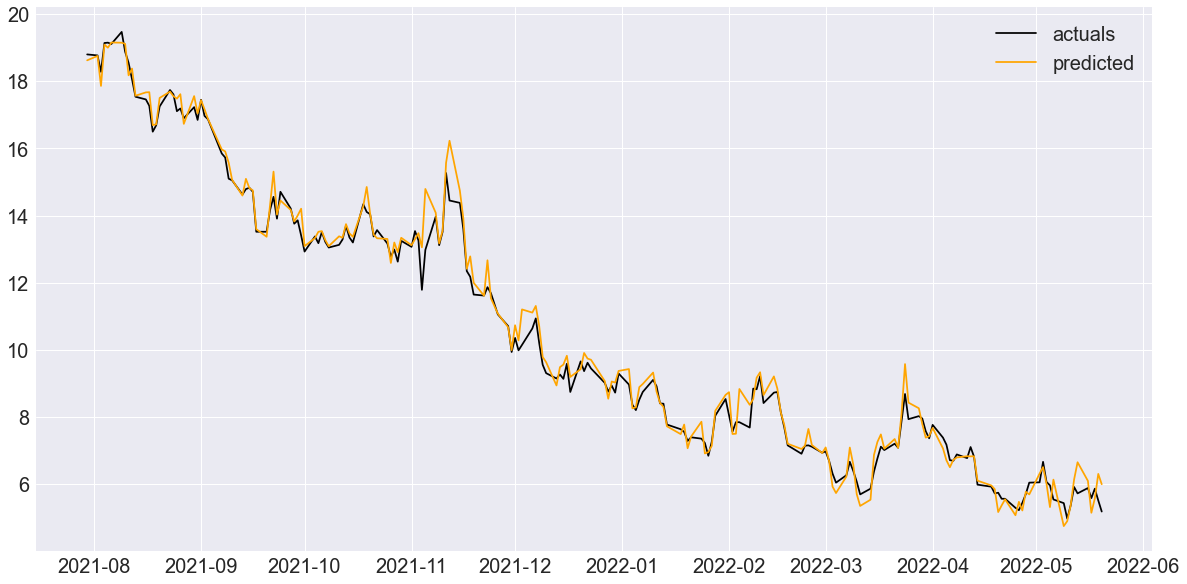

In [241]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test1['cgc_next_close'], color='black')
ax.plot(y_test1['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## CGC, Cannabis ETFs, and DJIX

In [69]:
df_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_etfs_dow.csv')
df_etfs_dow['Date'] = pd.to_datetime(df_etfs_dow['Date'])
df_etfs_dow = df_etfs_dow.set_index('Date')

In [70]:
df2 = pd.merge(df_cgc, df_etfs_dow, on='Date', how='left')
df2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07             NaN           3.629       NaN          NaN   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520             NaN    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 NaN                NaN                  NaN   
2014-04-08                 NaN                NaN                  NaN   
2014-04-09                 NaN                NaN                  NaN   
2014-04-10                 NaN                NaN                  NaN   
2014-04-11              3.3196                NaN                  NaN   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-08                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-09                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-10                 NaN      NaN      NaN     NaN       NaN        NaN   
2014-04-11                 NaN      NaN      NaN     NaN       NaN        NaN   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86   7.420      7.60  1251900.0   
2022-05-23              -0.036     7.62     7.64   7.409      7.46   960700.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            NaN            NaN      NaN         NaN   
2014-04-08            NaN            NaN   

In [71]:
df_isna2 = df2.isna()
df_isna2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                True     True     True    True      True       True   
2014-04-08                True     True     True    True      True       True   
2014-04-09                True     True     True    True      True       True   
2014-04-10                True     True     True    True      True       True   
2014-04-11                True     True     True    True      True       True   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17               False    False    False   False     False      False   
2022-05-18               False    False    False   False     False      False   
2022-05-19               False    False    False   False     False      False   
2022-05-20               False    False    False   False     False      False   
2022-05-23               False    False    False   False     False      False   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           True           True     True        True   
2014-04-08           True           True   

In [72]:
df_isna2 = df_isna2.add_suffix('_b')

In [73]:
df2 = df2.fillna(0)
df2.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-10                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-11                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   
2014-04-10            0.0            0.0      0.0         0.0   
2014-04-11            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   
2014-04-10                0.0               0.0                 0.0   
2014-04-11                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   
2014-04-10                0.0        0.0        0.0       0.0         0.0   
2014-04-11                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   
2014-04-10          0.0              0.0              0.0        0.0   
2014-04-11          0.0              0.0            

In [74]:
df2 = pd.concat([df2, df_isna2], axis=1)
df2

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-08               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-09               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-10               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-11               0.000     0.00     0.00   0.000      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86   7.420      7.60  1251900.0   
2022-05-23              -0.036     7.62     7.64   7.409      7.46   960700.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07           0.00           0.00     0.00    0.000000   
2014-04-08           0.00           0.00   

In [75]:
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['year'] = df2.index.year
df2['quarter'] = (df2['month']-1)//3 + 1

In [76]:
cols = df2.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [77]:
df2 = df2[cols].copy()
df2

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-08               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-09               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-10               0.000     0.00     0.00   0.000      0.00        0.0   
2014-04-11               0.000     0.00     0.00   0.000      0.00        0.0   
...                        ...      ...      ...     ...       ...        ...   
2022-05-17              -0.017     7.99     8.17   7.880      8.10   955200.0   
2022-05-18              -0.108     7.94     8.03   7.605      7.62  1532700.0   
2022-05-19              -0.020     7.56     7.86   7.540      7.78  1449800.0   
2022-05-20              -0.045     7.86     7.86  

In [78]:
df2.drop(df2.tail(1).index, inplace=True)

In [79]:
n = int(len(df2) * 0.9)
n

1842

In [80]:
train2 = df2[:n]
test2 = df2[n:]

In [81]:
print(len(train2))
print(len(test2))

1842
205


In [82]:
X_train2 = train2.drop('cgc_next_close', axis=1)
X_train2.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  mj_Open  mj_High  mj_Low  mj_Close  mj_Volume  \
Date                                                                            
2014-04-07                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-08                 0.0      0.0      0.0     0.0       0.0        0.0   
2014-04-09                 0.0      0.0      0.0     0.0       0.0        0.0   

            mj_prev_close  mj_next_close  mj_diff  mj_%change  \
Date                                                            
2014-04-07            0.0            0.0      0.0         0.0   
2014-04-08            0.0            0.0      0.0         0.0   
2014-04-09            0.0            0.0      0.0         0.0   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2014-04-07                0.0               0.0                 0.0   
2014-04-08                0.0               0.0                 0.0   
2014-04-09                0.0               0.0                 0.0   

            mj_10day_avg_diff  msos_Open  msos_High  msos_Low  msos_Close  \
Date                                                                        
2014-04-07                0.0        0.0        0.0       0.0         0.0   
2014-04-08                0.0        0.0        0.0       0.0         0.0   
2014-04-09                0.0        0.0        0.0       0.0         0.0   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2014-04-07          0.0              0.0              0.0        0.0   
2014-04-08          0.0              0.0              0.0        0.0   
2014-04-09          0.0              0.0              0.0        0.0   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2014-04-07           0.0                  0.0                 0.0   
2014-04-08           0.0                  0.0                 0.0   
2014-04-09           0.0                  0.0                 0.0   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2014-04-07                   0.0                  0.0        0.0        0.0   
2014-04-08                   0.0                  0.0        0.0        0.0   
2014-04-09                   0.0                  0.0        0.0        0.0   

            yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                             
2014-04-07       0.0         0.0          0.0              0.0   
2014-04-08       0.0         0.0          0.0              0.0   
2014-04-09       0.0         0.0          0.0              0.0   

 

In [83]:
X_train2.shape

(1842, 185)

In [84]:
y_train2 = train2['cgc_next_close']
y_train2.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [85]:
y_train2.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [86]:
X_test2 = test2.drop('cgc_next_close', axis=1)
y_test2 = test2['cgc_next_close']

In [87]:
X_test2.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff    mj_Open  mj_High     mj_Low   mj_Close  \
Date                                                                       
2021-07-30              -0.067  18.059999   18.420  17.888000  17.959999   
2021-08-02              -0.061  18.010000   18.386  17.879999  17.879999   
2021-08-03              -0.118  17.900000   17.990  17.639999  17.889999   

            mj_Volume  mj_prev_close  mj_next_close   mj_diff  mj_%change  \
Date                                                                        
2021-07-30   586900.0      18.320000      17.879999 -0.360001   -0.019651   
2021-08-02   766700.0      17.959999      17.889999 -0.080000   -0.004454   
2021-08-03   576300.0      17.879999      17.420000  0.010000    0.000559   

            mj_5day_avg_close  mj_5day_avg_diff  mj_10day_avg_close  \
Date                                                                  
2021-07-30             18.018              0.05              17.911   
2021-08-02             18.028              0.01              17.955   
2021-08-03             18.118              0.09              17.965   

            mj_10day_avg_diff  msos_Open  msos_High   msos_Low  msos_Close  \
Date                                                                         
2021-07-30              0.021  35.549999  35.820000  35.209999   35.639999   
2021-08-02              0.044  35.669998  36.450001  35.669998   36.410000   
2021-08-03              0.010  36.139999  36.247002  35.950001   36.090000   

            msos_Volume  msos_prev_close  msos_next_close  msos_diff  \
Date                                                                   
2021-07-30     436900.0        35.830002            36.41  -0.190003   
2021-08-02     490400.0        35.639999            36.09   0.770001   
2021-08-03     196500.0        36.410000            35.68  -0.320000   

            msos_%change  msos_5day_avg_close  msos_5day_avg_diff  \
Date                                                                
2021-07-30     -0.005303               35.648           -0.170001   
2021-08-02      0.021605               35.750            0.102000   
2021-08-03     -0.008789               35.958            0.208000   

            msos_10day_avg_close  msos_10day_avg_diff  yolo_Open  yolo_High  \
Date                                                                          
2021-07-30             36.225000               -0.178  18.889999  19.129000   
2021-08-02             36.252001                0.027  18.889999  19.191000   
2021-08-03             36.181001               -0.071  18.950001  18.969999   

             yolo_Low  yolo_Close  yolo_Volume  yolo_prev_close  \
Date                                                              
2021-07-30  18.650000   18.889999      63300.0        19.150000   
2021-08-02  18.889999   18.959999      51900.0        18.889999   
2021

In [88]:
X_test2.shape

(205, 185)

In [89]:
y_test2.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [90]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

In [91]:
y_pred2[:5]

array([18.76644935, 18.89026335, 17.96544252, 19.05683158, 19.05831563])

In [92]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man2 = rmse_manual(y_test2, y_pred2)
print(rmse_man2)

0.47861619255817534


In [93]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man2 = mae_manual(y_test2, y_pred2)
print(mae_man2)

0.3597322406865009


In [94]:
y_train2 = pd.DataFrame(y_train2, columns=['cgc_next_close'])
y_test2 = pd.DataFrame(y_test2, columns=['cgc_next_close'])

In [95]:
y_test2['cgc_pred_next_close'] = y_pred2

In [96]:
y_test2.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             6.100745
2022-05-17            5.59             5.414955
2022-05-18            5.87             5.754235
2022-05-19            5.52             6.417503
2022-05-20            5.19             6.205460

In [97]:
hyper_table.append(dict(stock='cgc', 
                        version='1+ETFs+Dow',
                        model=model2, 
                        rmse=rmse_man2,
                        mae=mae_man2,
                        actual_price=y_test2['cgc_next_close'][-1],
                        predicted_price=y_test2['cgc_pred_next_close'][-1],
                        rows=df2.shape[0], 
                        train_rows=X_train2.shape[0],
                        test_rows=X_test2.shape[0],
                        columns=df2.shape[1]))

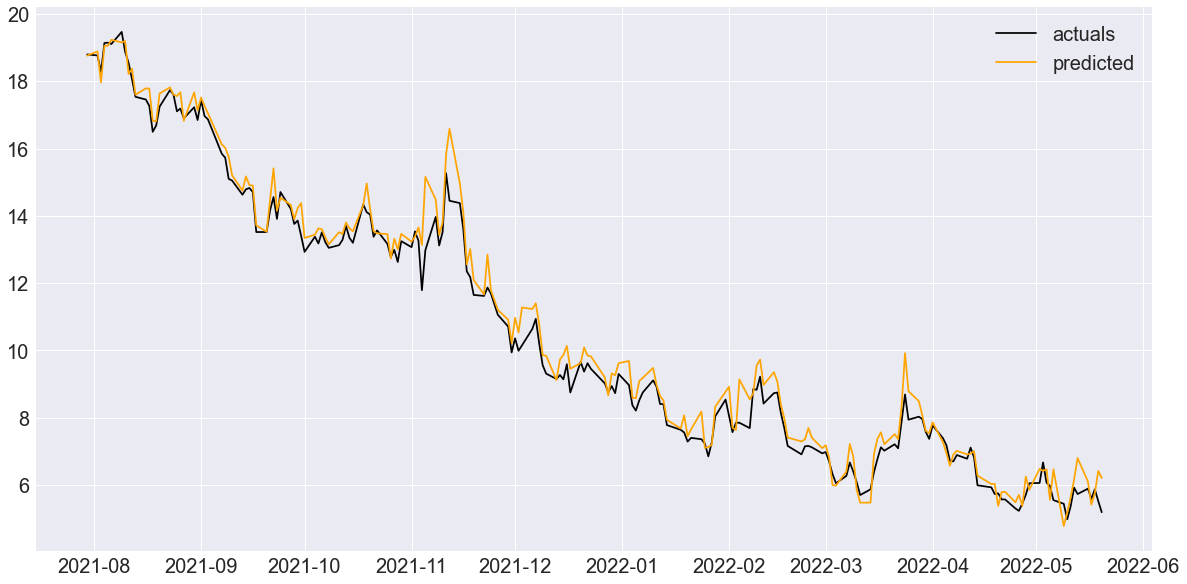

In [98]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test2['cgc_next_close'], color='black')
ax.plot(y_test2['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CGC target)

In [99]:
df_all = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all.csv')
df_all['Date'] = pd.to_datetime(df_all['Date'])
df_all = df_all.set_index('Date')

In [100]:
df_isna3 = df_all.isna()
df_isna3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [101]:
df_isna3 = df_isna3.add_suffix('_b')

In [102]:
df3 = df_all.fillna(0)
df3.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [103]:
df3 = pd.concat([df3, df_isna3], axis=1)
df3

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [104]:
df3['month'] = df3.index.month
df3['day'] = df3.index.day
df3['year'] = df3.index.year
df3['quarter'] = (df3['month']-1)//3 + 1

In [105]:
cols = df3.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [106]:
df3 = df3[cols].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [107]:
df3 = df3[cut:].copy()
df3

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [108]:
df3.drop(df3.tail(1).index, inplace=True)

In [109]:
n = int(len(df3) * 0.9)
n

1842

In [110]:
train3 = df3[:n]
test3 = df3[n:]

In [111]:
print(len(train3))
print(len(test3))

1842
205


In [112]:
X_train3 = train3.drop('cgc_next_close', axis=1)
X_train3.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [113]:
X_train3.shape

(1842, 263)

In [114]:
y_train3 = train3['cgc_next_close']
y_train3.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [115]:
y_train3.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [116]:
X_test3 = test3.drop('cgc_next_close', axis=1)
y_test3 = test3['cgc_next_close']

In [117]:
X_test3.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-30              -0.067       10.45       10.69     10.220   
2021-08-02              -0.061       10.20       11.11     10.200   
2021-08-03              -0.118       10.76       11.15     10.719   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-30       10.649      466800.0            10.370            11.080   
2021-08-02       11.080      673200.0            10.649            11.010   
2021-08-03       11.010      354400.0            11.080            10.878   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-30       0.279       0.026905               10.4166   
2021-08-02       0.431       0.040473               10.5286   
2021-08-03      -0.070      -0.006318               10.6944   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-30               0.0218                10.5273               -0.0351   
2021-08-02               0.1120                10.5763                0.0490   
2021-08-03               0.1658                10.6153                0.0390   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-30       7.50      7.600      7.36        7.37     850400.0   
2021-08-02       7.39      7.605      7.32        7.33     967900.0   
2021-08-03       7.35      7.400      7.27        7.39     901300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-30             7.56             7.33      -0.19     -0.025132   
2021-08-02             7.37             7.39      -0.04     -0.005427   
2021-08-03             7.33             7.11       0.06      0.008186   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-30                7.398               0.044                 7.329   
2021-08-02                7.406               0.008                 7.346   
2021-08-03                7.458               0.052                 7.352   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-30                0.019      12.035       12.80      11.80   
2021-08-02                0.017      12.000       12.50      11.95   
2021-08-03                0.006      12.350       12

In [118]:
X_test3.shape

(205, 263)

In [119]:
y_test3.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [120]:
model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

In [121]:
y_pred3[:5]

array([19.30941746, 18.45383821, 18.26779902, 18.21371891, 19.62275924])

In [122]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man3 = rmse_manual(y_test3, y_pred3)
print(rmse_man3)

0.8852293789719972


In [123]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man3 = mae_manual(y_test3, y_pred3)
print(mae_man3)

0.7327836412210057


In [124]:
y_train3 = pd.DataFrame(y_train3, columns=['cgc_next_close'])
y_test3 = pd.DataFrame(y_test3, columns=['cgc_next_close'])

In [125]:
y_test3['cgc_pred_next_close'] = y_pred3

In [126]:
y_test3.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             4.382057
2022-05-17            5.59             5.589845
2022-05-18            5.87             5.702613
2022-05-19            5.52             6.578361
2022-05-20            5.19             6.317470

In [127]:
hyper_table.append(dict(stock='cgc', 
                        version='All stocks',
                        model=model3, 
                        rmse=rmse_man3,
                        mae=mae_man3,
                        actual_price=y_test3['cgc_next_close'][-1],
                        predicted_price=y_test3['cgc_pred_next_close'][-1],
                        rows=df3.shape[0], 
                        train_rows=X_train3.shape[0],
                        test_rows=X_test3.shape[0],
                        columns=df3.shape[1]))

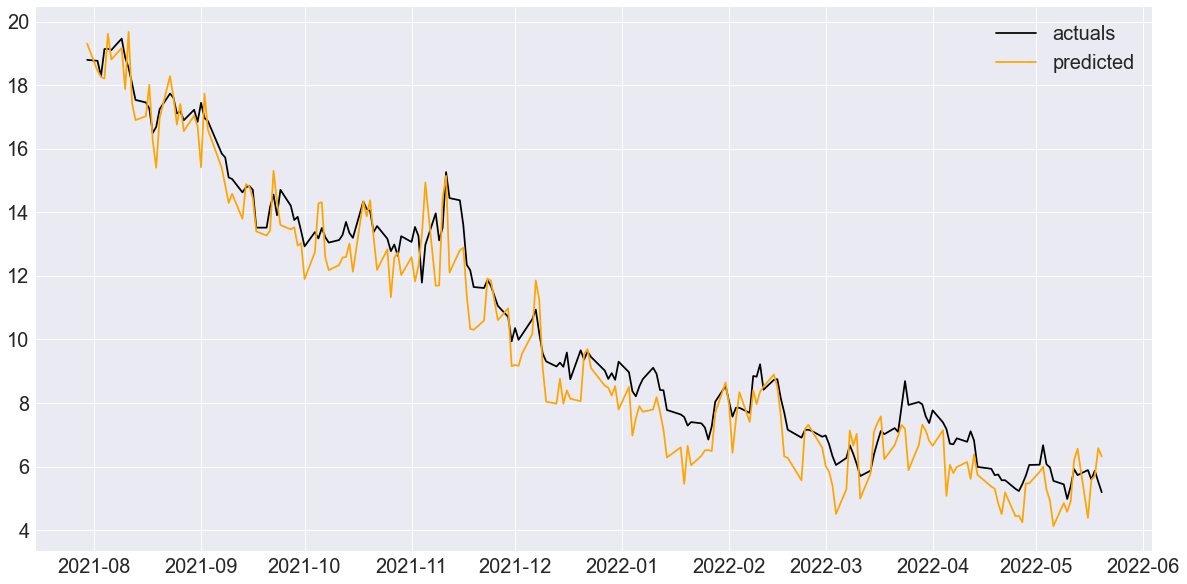

In [128]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test3['cgc_next_close'], color='black')
ax.plot(y_test3['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CGC target) and DJIX

In [129]:
df_all_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_dow.csv')
df_all_dow['Date'] = pd.to_datetime(df_all_dow['Date'])
df_all_dow = df_all_dow.set_index('Date')

In [130]:
df_isna4 = df_all_dow.isna()
df_isna4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [131]:
df_isna4 = df_isna4.add_suffix('_b')

In [132]:
df4 = df_all_dow.fillna(0)
df4.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [133]:
df4 = pd.concat([df4, df_isna4], axis=1)
df4

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [134]:
df4['month'] = df4.index.month
df4['day'] = df4.index.day
df4['year'] = df4.index.year
df4['quarter'] = (df4['month']-1)//3 + 1

In [135]:
cols = df4.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [136]:
df4 = df4[cols].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [137]:
df4 = df4[cut:].copy()
df4

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [138]:
df4.drop(df4.tail(1).index, inplace=True)

In [139]:
n = int(len(df4) * 0.9)
n

1842

In [140]:
train4 = df4[:n]
test4 = df4[n:]

In [141]:
print(len(train4))
print(len(test4))

1842
205


In [142]:
X_train4 = train4.drop('cgc_next_close', axis=1)
X_train4.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [143]:
X_train4.shape

(1842, 289)

In [144]:
y_train4 = train4['cgc_next_close']
y_train4.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [145]:
y_train4.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [146]:
X_test4 = test4.drop('cgc_next_close', axis=1)
y_test4 = test4['cgc_next_close']

In [147]:
X_test4.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-30              -0.067       10.45       10.69     10.220   
2021-08-02              -0.061       10.20       11.11     10.200   
2021-08-03              -0.118       10.76       11.15     10.719   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-30       10.649      466800.0            10.370            11.080   
2021-08-02       11.080      673200.0            10.649            11.010   
2021-08-03       11.010      354400.0            11.080            10.878   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-30       0.279       0.026905               10.4166   
2021-08-02       0.431       0.040473               10.5286   
2021-08-03      -0.070      -0.006318               10.6944   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-30               0.0218                10.5273               -0.0351   
2021-08-02               0.1120                10.5763                0.0490   
2021-08-03               0.1658                10.6153                0.0390   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-30       7.50      7.600      7.36        7.37     850400.0   
2021-08-02       7.39      7.605      7.32        7.33     967900.0   
2021-08-03       7.35      7.400      7.27        7.39     901300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-30             7.56             7.33      -0.19     -0.025132   
2021-08-02             7.37             7.39      -0.04     -0.005427   
2021-08-03             7.33             7.11       0.06      0.008186   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-30                7.398               0.044                 7.329   
2021-08-02                7.406               0.008                 7.346   
2021-08-03                7.458               0.052                 7.352   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-30                0.019      12.035       12.80      11.80   
2021-08-02                0.017      12.000       12.50      11.95   
2021-08-03                0.006      12.350       12

In [148]:
X_test4.shape

(205, 289)

In [149]:
y_test4.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [150]:
model4 = LinearRegression()
model4.fit(X_train4, y_train4)
y_pred4 = model4.predict(X_test4)

In [151]:
y_pred4[:5]

array([19.24468306, 18.44941499, 18.16736662, 18.2121535 , 19.50082327])

In [152]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man4 = rmse_manual(y_test4, y_pred4)
print(rmse_man4)

0.7898400244330991


In [153]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man4 = mae_manual(y_test4, y_pred4)
print(mae_man4)

0.6447648330439195


In [154]:
y_train4 = pd.DataFrame(y_train4, columns=['cgc_next_close'])
y_test4 = pd.DataFrame(y_test4, columns=['cgc_next_close'])

In [155]:
y_test4['cgc_pred_next_close'] = y_pred4

In [156]:
y_test4.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             4.817868
2022-05-17            5.59             5.558606
2022-05-18            5.87             5.907484
2022-05-19            5.52             6.750281
2022-05-20            5.19             6.335382

In [157]:
hyper_table.append(dict(stock='cgc', 
                        version='All+Dow',
                        model=model4, 
                        rmse=rmse_man4,
                        mae=mae_man4,
                        actual_price=y_test4['cgc_next_close'][-1],
                        predicted_price=y_test4['cgc_pred_next_close'][-1],
                        rows=df4.shape[0], 
                        train_rows=X_train4.shape[0],
                        test_rows=X_test4.shape[0],
                        columns=df4.shape[1]))

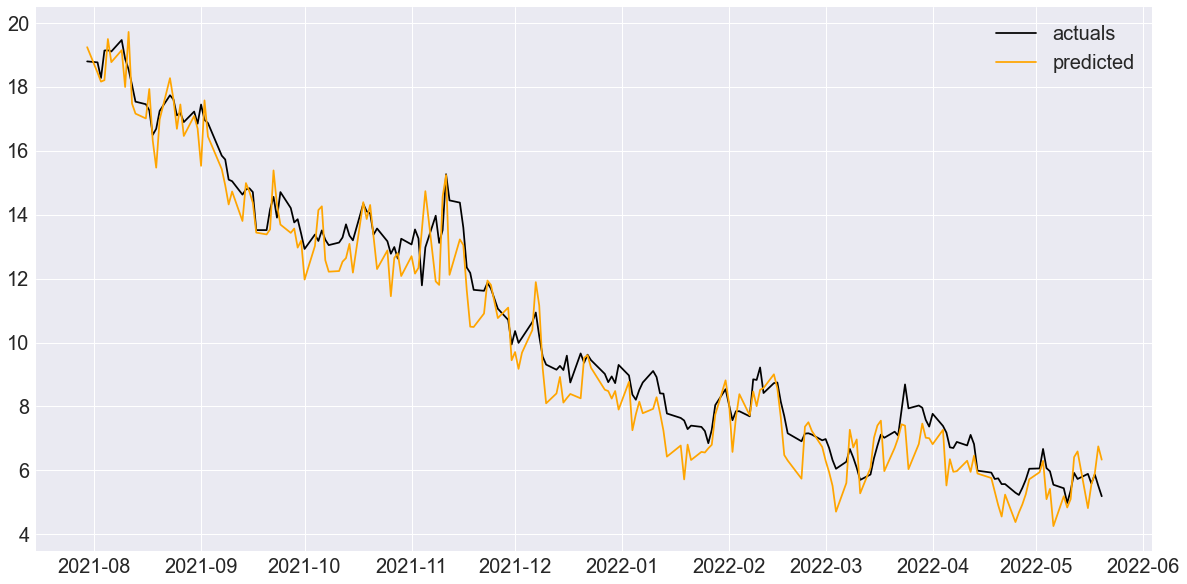

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test4['cgc_next_close'], color='black')
ax.plot(y_test4['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CGC target) and Cannabis ETFs

In [159]:
df_all_etfs = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs.csv')
df_all_etfs['Date'] = pd.to_datetime(df_all_etfs['Date'])
df_all_etfs = df_all_etfs.set_index('Date')

In [160]:
df_isna5 = df_all_etfs.isna()
df_isna5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [161]:
df_isna5 = df_isna5.add_suffix('_b')

In [162]:
df5 = df_all_etfs.fillna(0)
df5.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [163]:
df5 = pd.concat([df5, df_isna5], axis=1)
df5

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [164]:
df5['month'] = df5.index.month
df5['day'] = df5.index.day
df5['year'] = df5.index.year
df5['quarter'] = (df5['month']-1)//3 + 1

In [165]:
cols = df5.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [166]:
df5 = df5[cols].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [167]:
df5 = df5[cut:].copy()
df5

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [168]:
df5.drop(df5.tail(1).index, inplace=True)

In [169]:
n = int(len(df5) * 0.9)
n

1842

In [170]:
train5 = df5[:n]
test5 = df5[n:]

In [171]:
print(len(train5))
print(len(test5))

1842
205


In [172]:
X_train5 = train5.drop('cgc_next_close', axis=1)
X_train5.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [173]:
X_train5.shape

(1842, 393)

In [174]:
y_train5 = train5['cgc_next_close']
y_train5.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [175]:
y_train5.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [176]:
X_test5 = test5.drop('cgc_next_close', axis=1)
y_test5 = test5['cgc_next_close']

In [177]:
X_test5.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-30              -0.067       10.45       10.69     10.220   
2021-08-02              -0.061       10.20       11.11     10.200   
2021-08-03              -0.118       10.76       11.15     10.719   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-30       10.649      466800.0            10.370            11.080   
2021-08-02       11.080      673200.0            10.649            11.010   
2021-08-03       11.010      354400.0            11.080            10.878   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-30       0.279       0.026905               10.4166   
2021-08-02       0.431       0.040473               10.5286   
2021-08-03      -0.070      -0.006318               10.6944   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-30               0.0218                10.5273               -0.0351   
2021-08-02               0.1120                10.5763                0.0490   
2021-08-03               0.1658                10.6153                0.0390   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-30       7.50      7.600      7.36        7.37     850400.0   
2021-08-02       7.39      7.605      7.32        7.33     967900.0   
2021-08-03       7.35      7.400      7.27        7.39     901300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-30             7.56             7.33      -0.19     -0.025132   
2021-08-02             7.37             7.39      -0.04     -0.005427   
2021-08-03             7.33             7.11       0.06      0.008186   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-30                7.398               0.044                 7.329   
2021-08-02                7.406               0.008                 7.346   
2021-08-03                7.458               0.052                 7.352   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-30                0.019      12.035       12.80      11.80   
2021-08-02                0.017      12.000       12.50      11.95   
2021-08-03                0.006      12.350       12

In [178]:
X_test5.shape

(205, 393)

In [179]:
y_test5.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [180]:
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
y_pred5 = model5.predict(X_test5)

In [181]:
y_pred5[:5]

array([18.74834113, 19.13164337, 18.11209482, 18.78424274, 19.25693158])

In [182]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man5 = rmse_manual(y_test5, y_pred5)
print(rmse_man5)

0.6545990193318431


In [183]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man5 = mae_manual(y_test5, y_pred5)
print(mae_man5)

0.5156057041521045


In [184]:
y_train5 = pd.DataFrame(y_train5, columns=['cgc_next_close'])
y_test5 = pd.DataFrame(y_test5, columns=['cgc_next_close'])

In [185]:
y_test5['cgc_pred_next_close'] = y_pred5

In [186]:
y_test5.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             4.963134
2022-05-17            5.59             4.522493
2022-05-18            5.87             5.054076
2022-05-19            5.52             5.617880
2022-05-20            5.19             5.209393

In [187]:
hyper_table.append(dict(stock='cgc', 
                        version='All+ETFs',
                        model=model5, 
                        rmse=rmse_man5,
                        mae=mae_man5,
                        actual_price=y_test5['cgc_next_close'][-1],
                        predicted_price=y_test5['cgc_pred_next_close'][-1],
                        rows=df5.shape[0], 
                        train_rows=X_train5.shape[0],
                        test_rows=X_test5.shape[0],
                        columns=df5.shape[1]))

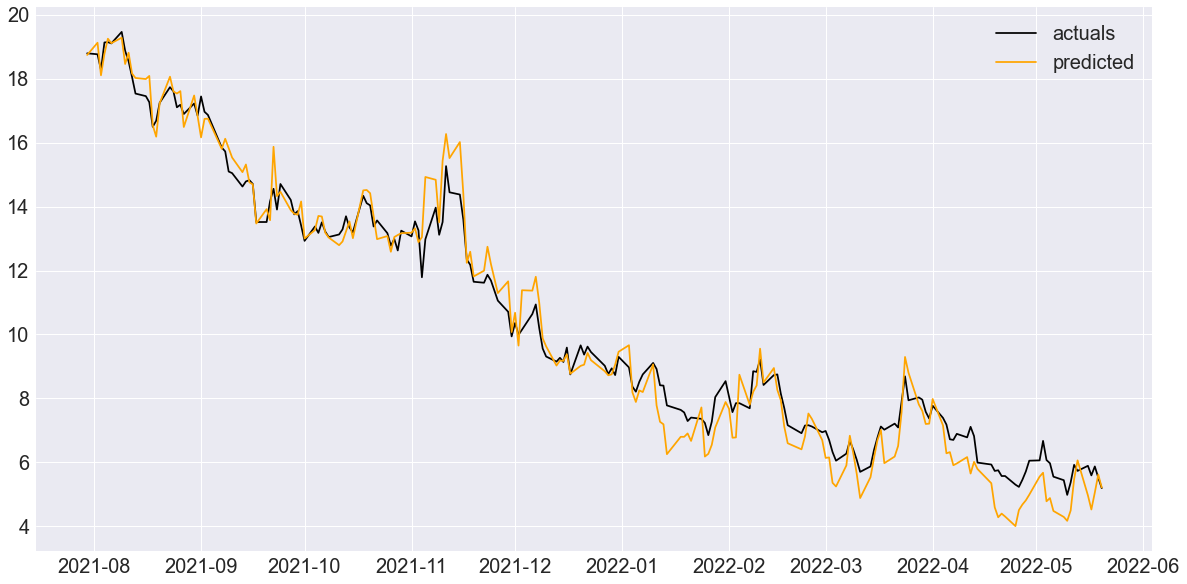

In [188]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test5['cgc_next_close'], color='black')
ax.plot(y_test5['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

## 10 Cannabis stocks (CGC target), Cannabis ETFs, and DJIX

In [189]:
df_all_etfs_dow = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/csvs/df_all_etfs_dow.csv')
df_all_etfs_dow['Date'] = pd.to_datetime(df_all_etfs_dow['Date'])
df_all_etfs_dow = df_all_etfs_dow.set_index('Date')

In [190]:
df_isna6 = df_all_etfs_dow.isna()
df_isna6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     False     False    False      False       False   
2014-04-08     False     False    False      False       False   
2014-04-09     False     False    False      False       False   
2014-04-10     False     False    False      False       False   
2014-04-11     False     False    False      False       False   
...              ...       ...      ...        ...         ...   
2022-05-17     False     False    False      False       False   
2022-05-18     False     False    False      False       False   
2022-05-19     False     False    False      False       False   
2022-05-20     False     False    False      False       False   
2022-05-23     False     False    False      False       False   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07            True           False      True         True   
2014-04-08           False           False     False        False   
2014-04-09           False           False     False        False   
2014-04-10           False           False     False        False   
2014-04-11           False           False     False        False   
...                    ...             ...       ...          ...   
2022-05-17           False           False     False        False   
2022-05-18           False           False     False        False   
2022-05-19           False           False     False        False   
2022-05-20           False           False     False        False   
2022-05-23           False            True     False        False   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                True               True                 True   
2014-04-08                True               True                 True   
2014-04-09                True               True                 True   
2014-04-10                True               True                 True   
2014-04-11               False               True                 True   
...                        ...                ...                  ...   
2022-05-17               False              False                False   
2022-05-18               False              False                False   
2022-05-19               False              False                False   
2022-05-20               False              False                False   
2022-05-23               False              False                False   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                True        True        True       True   
2014-04-08                True        True        True       True   
2014-04-09                True        True        True       True   
2014-04-10                True        True        True       True   
2014-04-11                True        True        True       True   
...                        ...         ...         ...        ...   
2022-05-17               False       False       False      False   
2022-05-18               False       False       False      False   
2022-05-19               False       False       False      False   
2022-05-20               False       False       False      False   
2022-05-23               False       False       False      False   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         True          True              True              True   
2014-04-08         True          True              True              True   
2014-04-09         True          True              True              True   
2014-04-1

In [191]:
df_isna6 = df_isna6.add_suffix('_b')

In [192]:
df6 = df_all_etfs_dow.fillna(0)
df6.head()

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000                0.0                  0.0   
2014-04-08              0.0000                0.0                  0.0   
2014-04-09              0.0000                0.0                  0.0   
2014-04-10              0.0000                0.0                  0.0   
2014-04-11              3.3196                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   
2014-04-10                 0.0         0.0         0.0        0.0   
2014-04-11                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   
2014-04-10          0.0           0.0               0.0               0.0   
2014-04-11          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   
2014-04-10         0.0            0.0                   0.0   
2014-04-11         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   
2014-04-10                  0.0                    0.0                   0.0   
2014-04-11                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   
2014-04-10        0.0        0.0       0.0         0.0          0.0   
2014-04-11        0.0        0.0       0.0         0.0          0.0   

            cron_prev

In [193]:
df6 = pd.concat([df6, df_isna6], axis=1)
df6

cgc_Open  cgc_High  cgc_Low  cgc_Close  cgc_Volume  \
Date                                                             
2014-04-07     2.448     3.458    2.444      3.300      168600   
2014-04-08     3.554     3.896    3.493      3.629      136800   
2014-04-09     3.720     3.720    3.100      3.299       75200   
2014-04-10     3.346     3.494    3.029      3.285      206100   
2014-04-11     3.204     3.293    3.045      3.085      114600   
...              ...       ...      ...        ...         ...   
2022-05-17     5.870     6.110    5.729      5.890     3131000   
2022-05-18     5.800     5.955    5.560      5.590     3909700   
2022-05-19     5.510     6.000    5.500      5.870     4272300   
2022-05-20     5.910     5.950    5.360      5.520     6379000   
2022-05-23     5.520     5.590    5.120      5.190     5931600   

            cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                
2014-04-07           0.000           3.629     0.000     0.000000   
2014-04-08           3.300           3.299     0.329     0.099697   
2014-04-09           3.629           3.285    -0.330    -0.090934   
2014-04-10           3.299           3.085    -0.014    -0.004244   
2014-04-11           3.285           2.668    -0.200    -0.060883   
...                    ...             ...       ...          ...   
2022-05-17           5.730           5.590     0.160     0.027923   
2022-05-18           5.890           5.870    -0.300    -0.050934   
2022-05-19           5.590           5.520     0.280     0.050089   
2022-05-20           5.870           5.190    -0.350    -0.059625   
2022-05-23           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07         0.00           0.0             0.000              0.00   
2014-04-08         0.00           0.0             0.000              0.00   
2014-04-09         0.00           0.0             0.000              0.00   
2014-04-1

In [194]:
df6['month'] = df6.index.month
df6['day'] = df6.index.day
df6['year'] = df6.index.year
df6['quarter'] = (df6['month']-1)//3 + 1

In [195]:
cols = df6.columns.tolist()
cols = cols[-4:] + cols[:-4]
cols[:5]

['month', 'day', 'year', 'quarter', 'cgc_Open']

In [196]:
df6 = df6[cols].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [197]:
df6 = df6[cut:].copy()
df6

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   
2014-04-10      4   10  2014        2     3.346     3.494    3.029      3.285   
2014-04-11      4   11  2014        2     3.204     3.293    3.045      3.085   
...           ...  ...   ...      ...       ...       ...      ...        ...   
2022-05-17      5   17  2022        2     5.870     6.110    5.729      5.890   
2022-05-18      5   18  2022        2     5.800     5.955    5.560      5.590   
2022-05-19      5   19  2022        2     5.510     6.000    5.500      5.870   
2022-05-20      5   20  2022        2     5.910     5.950    5.360      5.520   
2022-05-23      5   23  2022        2     5.520     5.590    5.120      5.190   

            cgc_Volume  cgc_prev_close  cgc_next_close  cgc_diff  cgc_%change  \
Date                                                                            
2014-04-07      168600           0.000           3.629     0.000     0.000000   
2014-04-08      136800           3.300           3.299     0.329     0.099697   
2014-04-09       75200           3.629           3.285    -0.330    -0.090934   
2014-04-10      206100           3.299           3.085    -0.014    -0.004244   
2014-04-11      114600           3.285           2.668    -0.200    -0.060883   
...                ...             ...             ...       ...          ...   
2022-05-17     3131000           5.730           5.590     0.160     0.027923   
2022-05-18     3909700           5.890           5.870    -0.300    -0.050934   
2022-05-19     4272300           5.590           5.520     0.280     0.050089   
2022-05-20     6379000           5.870           5.190    -0.350    -0.059625   
2022-05-23     5931600           5.520           0.000    -0.330    -0.059783   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07              0.0000              0.000                0.000   
2014-04-08              0.0000              0.000                0.000   
2014-04-09              0.0000              0.000                0.000   
2014-04-10              0.0000              0.000                0.000   
2014-04-11              3.3196              0.000                0.000   
...                        ...                ...                  ...   
2022-05-17              5.5780              0.090                5.759   
2022-05-18              5.7000              0.122                5.651   
2022-05-19              5.8000              0.100                5.631   
2022-05-20              5.7200             -0.080                5.586   
2022-05-23              5.6120             -0.108                5.550   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07               0.000       0.000        0.00      0.000   
2014-04-08               0.000       0.000        0.00      0.000   
2014-04-09               0.000       0.000        0.00      0.000   
2014-04-10               0.000       0.000        0.00      0.000   
2014-04-11               0.000       0.000        0.00      0.000   
...                        ...         ...         ...        ...   
2022-05-17              -0.017       3.973        4.10      3.900   
2022-05-18              -0.108       3.990        4.07      3.800   
2022-05-19              -0.020       3.990        4.03      3.840   
2022-05-20              -0.045       3.990        4.20      3.878   
2022-05-23              -0.036       4.210        4.22      4.080   

            crlbf_Close  crlbf_Volume  crlb

In [198]:
df6.drop(df6.tail(1).index, inplace=True)

In [199]:
n = int(len(df6) * 0.9)
n

1842

In [200]:
train6 = df6[:n]
test6 = df6[n:]

In [201]:
print(len(train6))
print(len(test6))

1842
205


In [202]:
X_train6 = train6.drop('cgc_next_close', axis=1)
X_train6.head(3)

month  day  year  quarter  cgc_Open  cgc_High  cgc_Low  cgc_Close  \
Date                                                                            
2014-04-07      4    7  2014        2     2.448     3.458    2.444      3.300   
2014-04-08      4    8  2014        2     3.554     3.896    3.493      3.629   
2014-04-09      4    9  2014        2     3.720     3.720    3.100      3.299   

            cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                            
2014-04-07      168600           0.000     0.000     0.000000   
2014-04-08      136800           3.300     0.329     0.099697   
2014-04-09       75200           3.629    -0.330    -0.090934   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2014-04-07                 0.0                0.0                  0.0   
2014-04-08                 0.0                0.0                  0.0   
2014-04-09                 0.0                0.0                  0.0   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2014-04-07                 0.0         0.0         0.0        0.0   
2014-04-08                 0.0         0.0         0.0        0.0   
2014-04-09                 0.0         0.0         0.0        0.0   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2014-04-07          0.0           0.0               0.0               0.0   
2014-04-08          0.0           0.0               0.0               0.0   
2014-04-09          0.0           0.0               0.0               0.0   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2014-04-07         0.0            0.0                   0.0   
2014-04-08         0.0            0.0                   0.0   
2014-04-09         0.0            0.0                   0.0   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2014-04-07                  0.0                    0.0                   0.0   
2014-04-08                  0.0                    0.0                   0.0   
2014-04-09                  0.0                    0.0                   0.0   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2014-04-07        0.0        0.0       0.0         0.0          0.0   
2014-04-08        0.0        0.0       0.0         0.0          0.0   
2014-04-09        0.0        0.0       0.0         0.0          0.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2014-04-07              0.0              0.0        0.0           0.0   
2014-04-08              0.0              0.0        0.0           0.0   
2014-04-09              0.0              0.0        0.0           0.0   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2014-04-07                  0.0                 0.0                   0.0   
2014-04-08                  0.0                 0.0                   0.0   
2014-04-09                  0.0                 0.0                   0.0   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2014-04-07                  0.0         0.0         0.0        0.0   
2014-04-08                  0.0         0.0         0.0        0.0   
2014-04-09                  0.0         0.0         0.0        0.0   

 

In [203]:
X_train6.shape

(1842, 419)

In [204]:
y_train6 = train6['cgc_next_close']
y_train6.head(3)

Date
2014-04-07    3.629
2014-04-08    3.299
2014-04-09    3.285
Name: cgc_next_close, dtype: float64

In [205]:
y_train6.tail(3)

Date
2021-07-27    19.600000
2021-07-28    19.540001
2021-07-29    18.910000
Name: cgc_next_close, dtype: float64

In [206]:
X_test6 = test6.drop('cgc_next_close', axis=1)
y_test6 = test6['cgc_next_close']

In [207]:
X_test6.head(3)

month  day  year  quarter   cgc_Open   cgc_High    cgc_Low  \
Date                                                                     
2021-07-30      7   30  2021        3  19.400000  19.558001  18.780001   
2021-08-02      8    2  2021        3  19.020000  19.350000  18.799999   
2021-08-03      8    3  2021        3  18.799999  18.920000  18.340000   

            cgc_Close  cgc_Volume  cgc_prev_close  cgc_diff  cgc_%change  \
Date                                                                       
2021-07-30  18.910000     2437200       19.540001 -0.630001    -0.032242   
2021-08-02  18.799999     2145200       18.910000 -0.110001    -0.005817   
2021-08-03  18.770000     2670600       18.799999 -0.029999    -0.001596   

            cgc_5day_avg_close  cgc_5day_avg_diff  cgc_10day_avg_close  \
Date                                                                     
2021-07-30              19.226             -0.142               19.538   
2021-08-02              19.044             -0.182               19.477   
2021-08-03              19.124              0.080               19.359   

            cgc_10day_avg_diff  crlbf_Open  crlbf_High  crlbf_Low  \
Date                                                                
2021-07-30              -0.067       10.45       10.69     10.220   
2021-08-02              -0.061       10.20       11.11     10.200   
2021-08-03              -0.118       10.76       11.15     10.719   

            crlbf_Close  crlbf_Volume  crlbf_prev_close  crlbf_next_close  \
Date                                                                        
2021-07-30       10.649      466800.0            10.370            11.080   
2021-08-02       11.080      673200.0            10.649            11.010   
2021-08-03       11.010      354400.0            11.080            10.878   

            crlbf_diff  crlbf_%change  crlbf_5day_avg_close  \
Date                                                          
2021-07-30       0.279       0.026905               10.4166   
2021-08-02       0.431       0.040473               10.5286   
2021-08-03      -0.070      -0.006318               10.6944   

            crlbf_5day_avg_diff  crlbf_10day_avg_close  crlbf_10day_avg_diff  \
Date                                                                           
2021-07-30               0.0218                10.5273               -0.0351   
2021-08-02               0.1120                10.5763                0.0490   
2021-08-03               0.1658                10.6153                0.0390   

            cron_Open  cron_High  cron_Low  cron_Close  cron_Volume  \
Date                                                                  
2021-07-30       7.50      7.600      7.36        7.37     850400.0   
2021-08-02       7.39      7.605      7.32        7.33     967900.0   
2021-08-03       7.35      7.400      7.27        7.39     901300.0   

            cron_prev_close  cron_next_close  cron_diff  cron_%change  \
Date                                                                    
2021-07-30             7.56             7.33      -0.19     -0.025132   
2021-08-02             7.37             7.39      -0.04     -0.005427   
2021-08-03             7.33             7.11       0.06      0.008186   

            cron_5day_avg_close  cron_5day_avg_diff  cron_10day_avg_close  \
Date                                                                        
2021-07-30                7.398               0.044                 7.329   
2021-08-02                7.406               0.008                 7.346   
2021-08-03                7.458               0.052                 7.352   

            cron_10day_avg_diff  curlf_Open  curlf_High  curlf_Low  \
Date                                                                 
2021-07-30                0.019      12.035       12.80      11.80   
2021-08-02                0.017      12.000       12.50      11.95   
2021-08-03                0.006      12.350       12

In [208]:
X_test6.shape

(205, 419)

In [209]:
y_test6.tail(3)

Date
2022-05-18    5.87
2022-05-19    5.52
2022-05-20    5.19
Name: cgc_next_close, dtype: float64

In [210]:
model6 = LinearRegression()
model6.fit(X_train6, y_train6)
y_pred6 = model6.predict(X_test6)

In [211]:
y_pred6[:5]

array([18.76211026, 19.14637125, 18.12430824, 18.75084455, 19.28124552])

In [212]:
def rmse_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_pred = predicted[i] - actual.iloc[i]
        error_sum += (error_pred ** 2)
    error_mean = error_sum / float(len(actual))
    return sqrt(error_mean)
 
# Test RMSE
rmse_man6 = rmse_manual(y_test6, y_pred6)
print(rmse_man6)

0.6896114297136682


In [213]:
def mae_manual(actual, predicted):
    error_sum = 0.0
    for i in range(len(actual)):
        error_sum += abs(predicted[i] - actual.iloc[i])
    return error_sum / float(len(actual))
 
# Test MAE
mae_man6 = mae_manual(y_test6, y_pred6)
print(mae_man6)

0.5514764888013748


In [214]:
y_train6 = pd.DataFrame(y_train6, columns=['cgc_next_close'])
y_test6 = pd.DataFrame(y_test6, columns=['cgc_next_close'])

In [215]:
y_test6['cgc_pred_next_close'] = y_pred6

In [216]:
y_test6.tail()

cgc_next_close  cgc_pred_next_close
Date                                           
2022-05-16            5.89             4.725886
2022-05-17            5.59             4.503687
2022-05-18            5.87             4.991761
2022-05-19            5.52             5.487647
2022-05-20            5.19             5.160700

In [217]:
hyper_table.append(dict(stock='cgc', 
                        version='All+ETFs+Dow',
                        model=model6, 
                        rmse=rmse_man6,
                        mae=mae_man6,
                        actual_price=y_test6['cgc_next_close'][-1],
                        predicted_price=y_test6['cgc_pred_next_close'][-1],
                        rows=df6.shape[0], 
                        train_rows=X_train6.shape[0],
                        test_rows=X_test6.shape[0],
                        columns=df6.shape[1]))

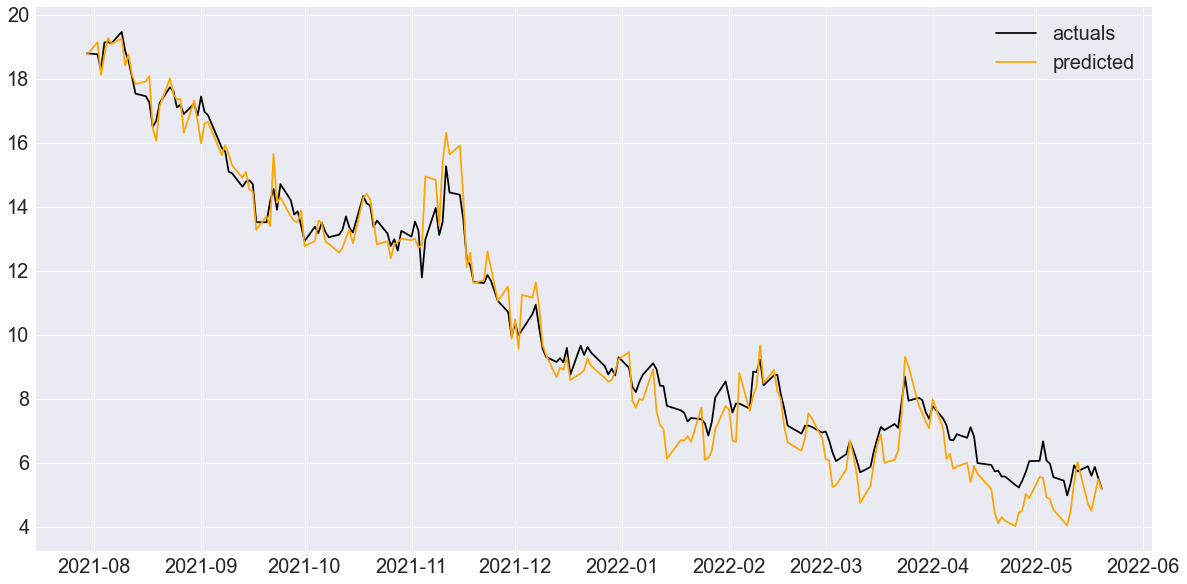

In [218]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(y_test6['cgc_next_close'], color='black')
ax.plot(y_test6['cgc_pred_next_close'], color='orange')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(['actuals', 'predicted'], fontsize=20)
plt.show()

In [219]:
hyper_table = pd.DataFrame(hyper_table)
hyper_table = hyper_table.sort_values('rmse', ascending=True)
hyper_table

stock       version               model      rmse       mae  actual_price  \
1   cgc        1+ETFs  LinearRegression()  0.374605  0.258421          5.19   
0   cgc         1+Dow  LinearRegression()  0.446634  0.348779          5.19   
2   cgc    1+ETFs+Dow  LinearRegression()  0.478616  0.359732          5.19   
5   cgc      All+ETFs  LinearRegression()  0.654599  0.515606          5.19   
6   cgc  All+ETFs+Dow  LinearRegression()  0.689611  0.551476          5.19   
4   cgc       All+Dow  LinearRegression()  0.789840  0.644765          5.19   
3   cgc    All stocks  LinearRegression()  0.885229  0.732784          5.19   

   predicted_price  rows  train_rows  test_rows  columns  
1         6.002075  2047        1842        205      160  
0         6.010600  2047        1842        205       56  
2         6.205460  2047        1842        205      186  
5         5.209393  2047        1842        205      394  
6         5.160700  2047        1842        205      420  
4         6.335382  2047        1842        205      290  
3         6.317470  2047        1842        205      264

In [220]:
hyper_table_cgc = hyper_table.head(1)
hyper_table_cgc

stock version               model      rmse       mae  actual_price  \
1   cgc  1+ETFs  LinearRegression()  0.374605  0.258421          5.19   

   predicted_price  rows  train_rows  test_rows  columns  
1         6.002075  2047        1842        205      160

In [221]:
hyper_table_cgc.to_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone3-Stock_Price_Prediction/data from notebooks/hyper_table_cgc.csv', index=True)

## Simulation - Sell

In [222]:
cgc_sim = df1[n:]
cgc_sim = cgc_sim[['cgc_Open', 'cgc_Close']]
cgc_sim.head()

cgc_Open  cgc_Close
Date                            
2021-07-30  19.400000  18.910000
2021-08-02  19.020000  18.799999
2021-08-03  18.799999  18.770000
2021-08-04  18.660000  18.280001
2021-08-05  18.270000  19.139999

In [223]:
cgc_sim.shape

(205, 2)

In [224]:
cgc_sim.tail()

cgc_Open  cgc_Close
Date                           
2022-05-16      5.89       5.73
2022-05-17      5.87       5.89
2022-05-18      5.80       5.59
2022-05-19      5.51       5.87
2022-05-20      5.91       5.52

In [225]:
cgc_sim['cgc_Pred_Close'] = y_pred1
cgc_sim.head()

cgc_Open  cgc_Close  cgc_Pred_Close
Date                                            
2021-07-30  19.400000  18.910000       18.624120
2021-08-02  19.020000  18.799999       18.754074
2021-08-03  18.799999  18.770000       17.861301
2021-08-04  18.660000  18.280001       19.090451
2021-08-05  18.270000  19.139999       19.000472

In [226]:
cgc_sim['Trade'] = cgc_sim['cgc_Pred_Close'] > cgc_sim['cgc_Open']
cgc_sim.head()

cgc_Open  cgc_Close  cgc_Pred_Close  Trade
Date                                                   
2021-07-30  19.400000  18.910000       18.624120  False
2021-08-02  19.020000  18.799999       18.754074  False
2021-08-03  18.799999  18.770000       17.861301  False
2021-08-04  18.660000  18.280001       19.090451   True
2021-08-05  18.270000  19.139999       19.000472   True

In [228]:
cgc_sim = cgc_sim[cgc_sim['Trade']==True]
cgc_sim.head()

cgc_Open  cgc_Close  cgc_Pred_Close  Trade    Gains
Date                                                            
2021-08-04  18.660000  18.280001       19.090451   True -37.9999
2021-08-05  18.270000  19.139999       19.000472   True  86.9999
2021-08-09  19.049999  19.110001       19.148477   True   6.0002
2021-08-17  17.350000  17.459999       17.675571   True  10.9999
2021-08-20  16.459999  16.690001       17.504651   True  23.0002
...               ...        ...             ...    ...      ...
2022-05-12   4.890000   5.370000        6.146160   True  48.0000
2022-05-13   5.500000   5.920000        6.657147   True  42.0000
2022-05-16   5.890000   5.730000        6.101516   True -16.0000
2022-05-19   5.510000   5.870000        6.310416   True  36.0000
2022-05-20   5.910000   5.520000        6.002075   True -39.0000

[99 rows x 5 columns]

In [227]:
cgc_sim['Gains'] = (cgc_sim['cgc_Close'] - cgc_sim['cgc_Open'])*100
cgc_sim.head()

cgc_Open  cgc_Close  cgc_Pred_Close  Trade    Gains
Date                                                            
2021-07-30  19.400000  18.910000       18.624120  False -49.0000
2021-08-02  19.020000  18.799999       18.754074  False -22.0001
2021-08-03  18.799999  18.770000       17.861301  False  -2.9999
2021-08-04  18.660000  18.280001       19.090451   True -37.9999
2021-08-05  18.270000  19.139999       19.000472   True  86.9999

In [234]:
total_gains = cgc_sim['Gains'].sum()
print(round(total_gains, 2))

1655.3
